In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


Downloading...
From: https://drive.google.com/uc?id=1sDzcLKVZBQWeEYT101bEWCltlaFPjiIN
To: /content/C4_W2_Assignment_Image.png
100% 18.5k/18.5k [00:00<00:00, 21.1MB/s]
Expected:


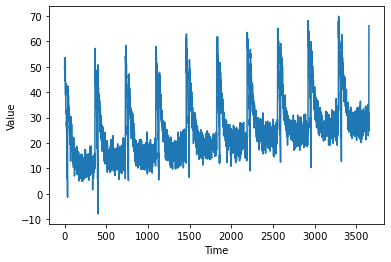

Your output:


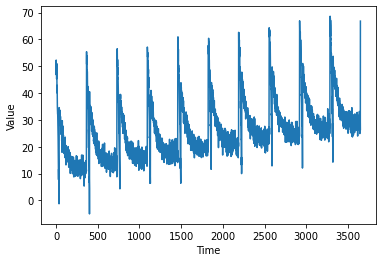

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6* np.pi),
                    1 / np.exp(5* season_time)) #YOUR CODE HERE# 

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline =10 # YOUR CODE HERE #
series = trend(time, 0.1)# YOUR CODE HERE#
baseline = 10
amplitude = 40
slope =0.005 # YOUR CODE HERE#
noise_level = 2 # YOUR CODE HERE#

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

# # # # # expected output
!gdown --id 1sDzcLKVZBQWeEYT101bEWCltlaFPjiIN
print("Expected:")
from IPython.display import display
from PIL import Image
path='./C4_W2_Assignment_Image.png'
display(Image.open(path))
# # # # #

### your output
print("Your output:")
plot_series(time, series)

In [3]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

def creat_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[window_size],activation="relu"),# YOUR CODE HERE #
    tf.keras.layers.Dense(10, activation="relu"), # YOUR CODE HERE #
    tf.keras.layers.Dense(1)])
    return model


In [5]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Amend the learning rate of the optimizer on the fly, after each epoch
model = creat_model()
lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch/20))
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9))   # YOUR CODE HERE#
history =model.fit(dataset,epochs=100,callbacks=[lr_schedule],verbose=0)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


(1e-08, 0.001, 0.0, 300.0)

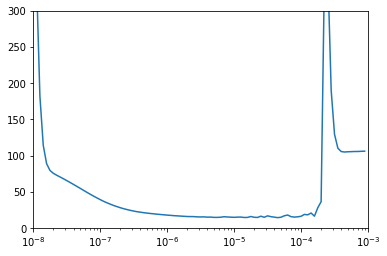

In [6]:
# plot the learing rate and loss 
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [13]:
# Based on the plotted image, choose the learning rate as 1e-5
model = creat_model()
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5,momentum=0.9))   # YOUR CODE HERE#
history =model.fit(dataset,epochs=500,verbose=0)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


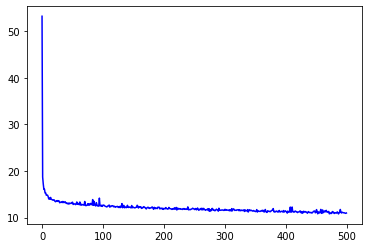

In [14]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

[14.499587059020996, 13.982386589050293, 14.163455963134766, 13.941034317016602, 14.316204071044922, 13.929553985595703, 13.87259292602539, 13.797381401062012, 13.718642234802246, 13.805381774902344, 13.77881145477295, 13.51908016204834, 13.397951126098633, 13.474442481994629, 13.622543334960938, 13.466064453125, 13.64471435546875, 13.45786190032959, 13.561209678649902, 13.165567398071289, 13.267753601074219, 13.294462203979492, 13.37063980102539, 13.201135635375977, 13.452712059020996, 13.351840019226074, 13.191097259521484, 13.322629928588867, 13.38284683227539, 13.135578155517578, 13.027055740356445, 13.131031036376953, 12.968337059020996, 12.910557746887207, 13.127974510192871, 12.94359302520752, 13.075818061828613, 13.039682388305664, 13.028315544128418, 13.227034568786621, 13.29276180267334, 12.807782173156738, 12.989421844482422, 12.936335563659668, 12.85788631439209, 12.775358200073242, 12.932183265686035, 13.339489936828613, 12.843838691711426, 13.045345306396484, 12.911431312

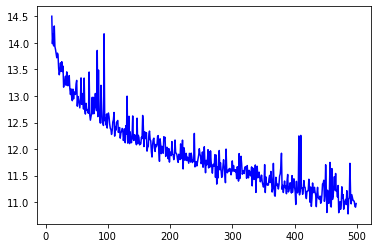

In [15]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

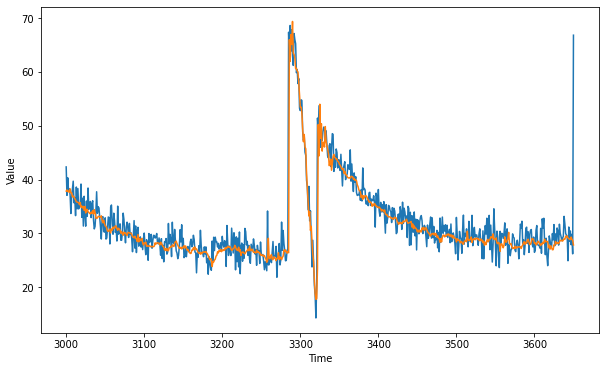

In [16]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [17]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()
# EXPECTED OUTPUT
# A Value less than 3

1.9361216